# Customer attrition, customer turnover, or customer defection: 
they all refer to the loss of clients or customers, ie, churn. This can be due to voluntary reasons (by choice) or involuntary reasons (for example relocation). Here, we will explore 8 predictive analytic models to assess customers’ propensity or risk to churn. These models can generate a list of customers who are most vulnerable to churn, so that business can work towards retaining them.

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
plt.style.use('dark_background')
font = {'family': 'serif',
        'color':  'white',
        'weight': 'bold',
        'size': 16,
        }

In [4]:
df = pd.read_csv('Telco-Customer-Churn.csv')

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.shape

(7043, 21)

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df[df['TotalCharges'].str.replace('.','').str.isdigit()==False]['TotalCharges'].unique()

C:\Users\asus\AppData\Local\Temp\ipykernel_7756\1269141955.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[df['TotalCharges'].str.replace('.','').str.isdigit()==False]['TotalCharges'].unique()


array([' '], dtype=object)

In [9]:
df['TotalCharges'] = df['TotalCharges'].replace(' ',np.nan)
df = df.dropna()
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [10]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
df = df.drop(columns='customerID')

In [13]:
df['Churn'] = [1 if x=='Yes' else 0 for x in df['Churn']]

In [14]:
dfd = pd.get_dummies(df)
dfd.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [15]:
dfd.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

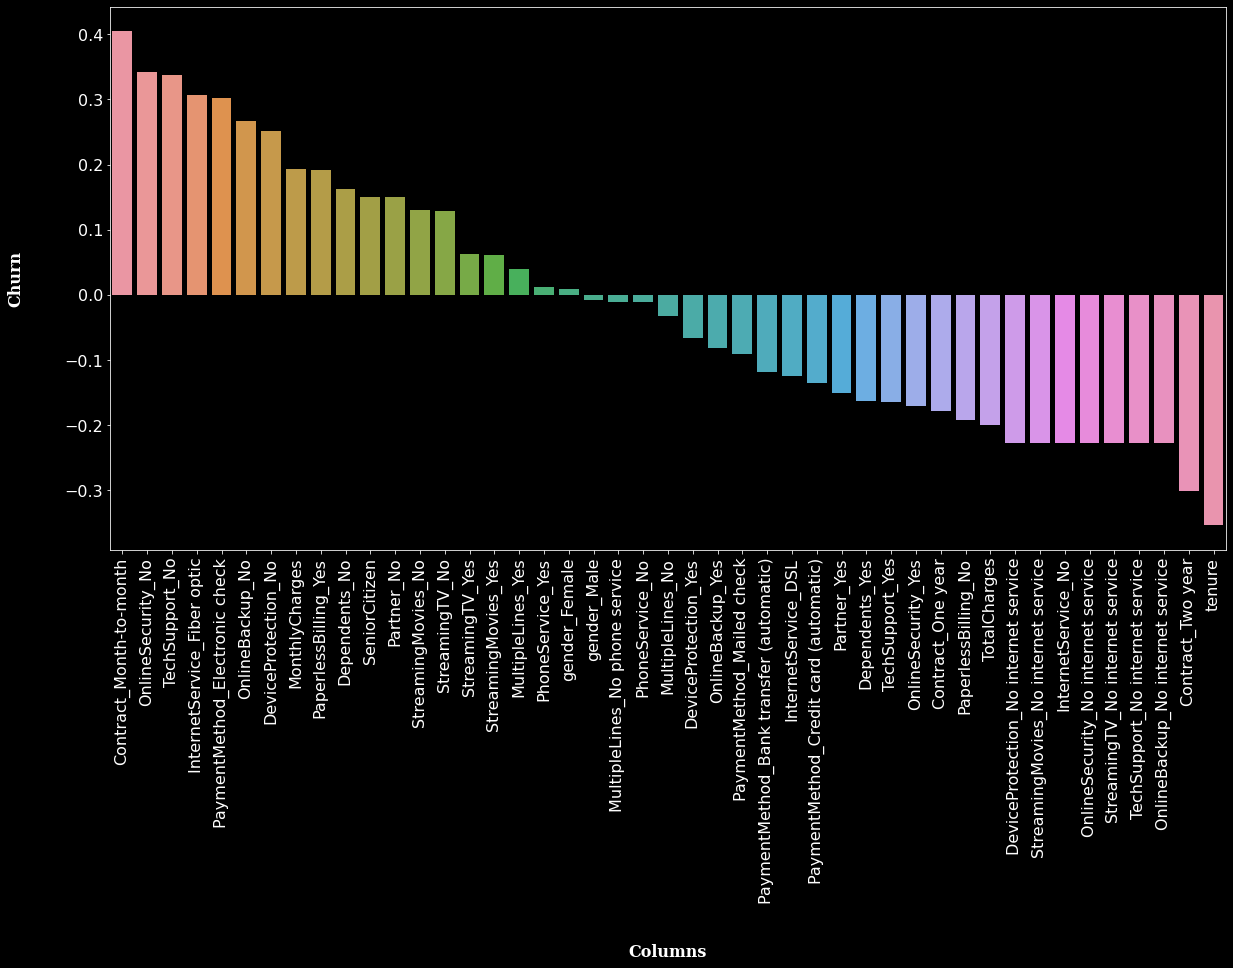

In [16]:
corr = dfd.corr()['Churn'].sort_values(ascending = False)
corr = corr.iloc[1:]
plt.figure(figsize=(20,10))
plt.xlabel('Columns',fontdict=font,labelpad=40)
plt.ylabel('Correlation with Churn',fontdict=font,labelpad=40)
plt.xticks(fontsize=16,rotation='vertical')
plt.yticks(fontsize=16)
sns.barplot(x=corr.index, y=corr)
plt.show()

Anything that has a correlation less than 0.1, should be dropped as it won't affect the output much.

Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

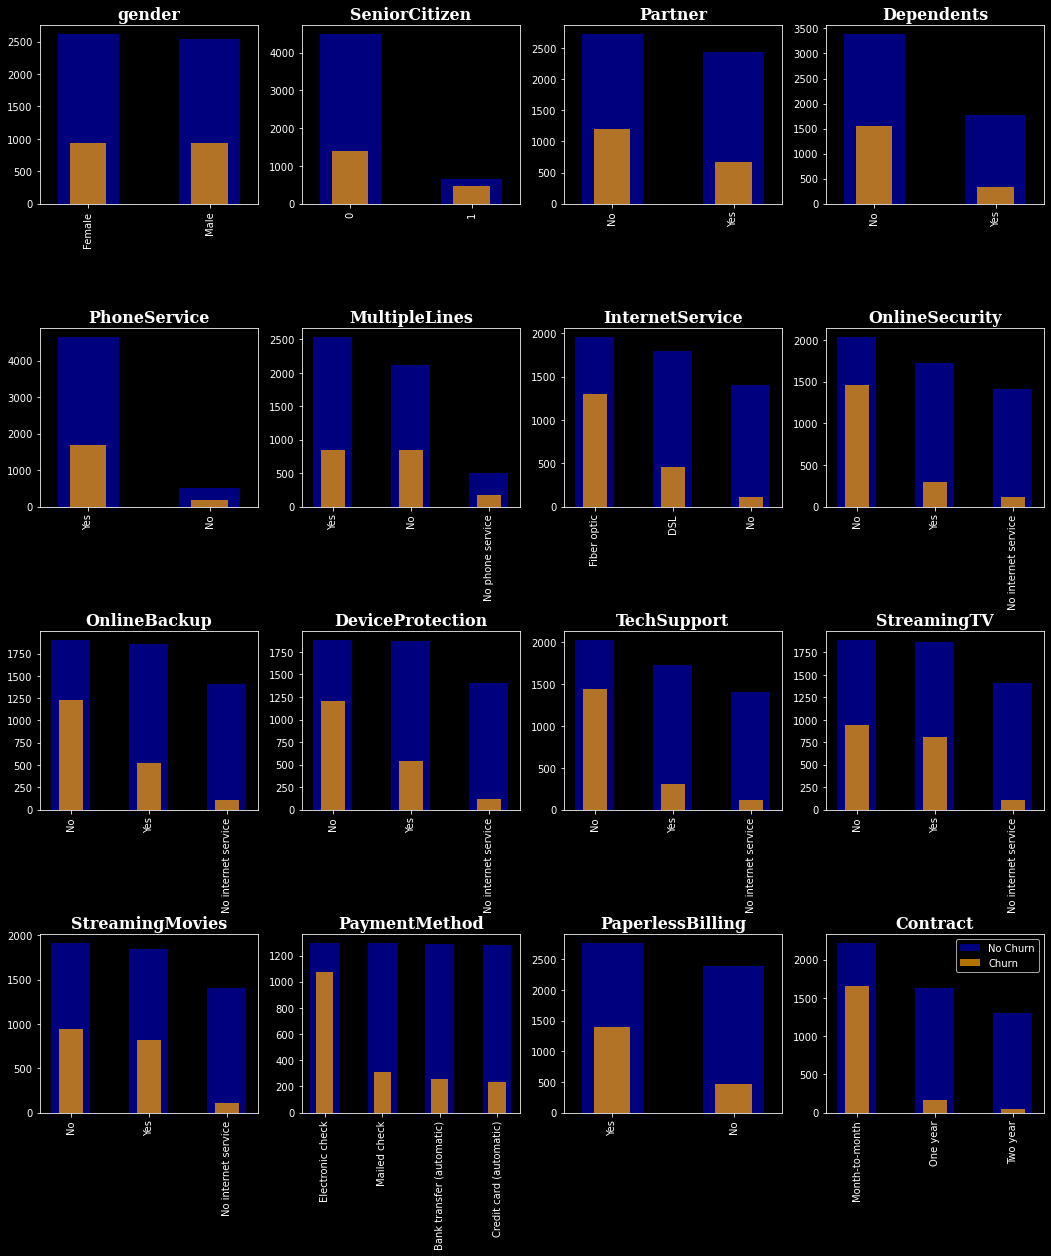

In [17]:
categorical_features = [ 'gender', 'SeniorCitizen', 'Partner',
 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod',
 'PaperlessBilling', 'Contract' ]
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 20) )
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1: 
        row += 1
    col = i % COLS
    df[df.Churn==0][categorical_feature].value_counts().plot(kind='bar', width=.5, ax=ax[row, col], color='blue', alpha=0.5).set_title(categorical_feature, fontdict=font)
    df[df.Churn==1][categorical_feature].value_counts().plot(kind='bar', width=.3, ax=ax[row, col], color='orange', alpha=0.7).set_title(categorical_feature, fontdict=font)
    plt.legend(['No Churn', 'Churn'])
    fig.subplots_adjust(hspace=0.7)

C:\Users\asus\AppData\Roaming\jupyterlab-desktop\jlab_server\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Two Year Contract')

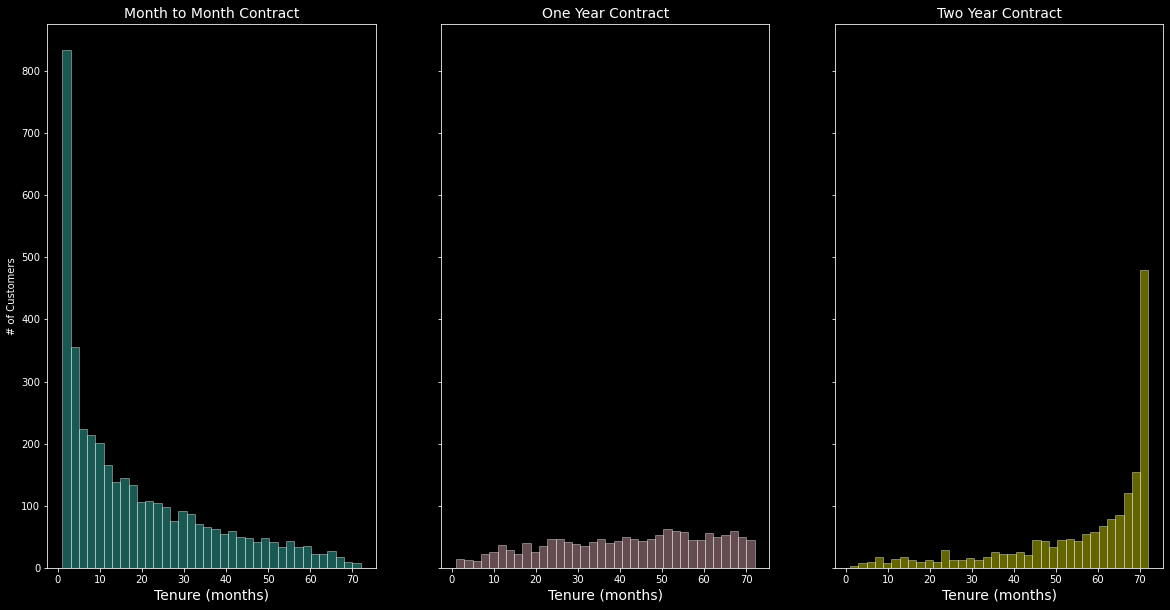

In [18]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,10))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'white'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Month to Month Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'pink',
                   hist_kws={'edgecolor':'white'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'yellow',
                   hist_kws={'edgecolor':'white'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('Two Year Contract',size = 14)

Customers with monthly contracts are more likely to leave the company while ones with Two Year contracts are less likely to do so. This might be because, the money paid might be non-refundable and hence the customers with longer contracts are bound to stay in the company.

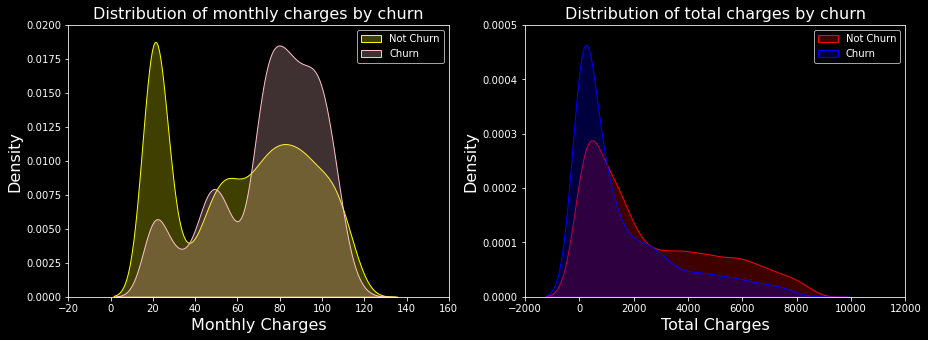

In [19]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (15,5))
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 0) ], ax=ax1,
                color="Yellow", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 1) ],
                ax =ax1, color="Pink", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density', size=16)
ax.set_xlabel('Monthly Charges', size=16)
ax.set_title('Distribution of monthly charges by churn', size=16)
ax.set_xticks(ticks = ax.get_xticks(),size=16)
ax.set_yticks(ticks = ax.get_yticks(),size=16)

ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 0) ], ax=ax2,
                color="Red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 1) ],
                ax =ax2, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density',size=16)
ax.set_xlabel('Total Charges',size=16)
ax.set_title('Distribution of total charges by churn',size=16)
ax.set_xticks(ticks = ax.get_xticks(),size=16)
ax.set_yticks(ticks = ax.get_yticks(),size=16)
plt.show()

In [20]:
# We will use the data frame where we had created dummy variables
y = dfd['Churn'].values
X = dfd.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
acc = []

In [44]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [47]:
def evaluating(model,X_test,y_test):
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)*100
    print ('Accuracy:',acc,'%')
    print('ROC Score:',roc_auc_score(y_test, y_pred))
    print()
    print('Classification Report:')
    cr = classification_report(y_test, y_pred)
    print(cr)
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['No','Yes']
    group_names = ['True No','False Yes', 'False No','True Yes'] #configuration of a confusin matrix
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)] #converting confusion matrix value to percentage in 2 decimal places.

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    print()
    print('Confusion matrix')
    sns.heatmap(cf_matrix, annot = labels, cmap = 'PiYG',fmt = '',
                xticklabels = categories, yticklabels = categories)
    plt.show()
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    print()
    print('ROC Curve:')
    #create ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    return acc

Accuracy: 80.75829383886256 %
ROC Score: 0.718545497969907

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.54      0.58       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.80      2110



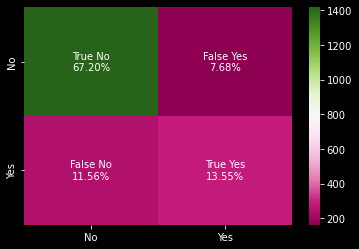

In [24]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)
a = evaluating(model,X_test,y_test)
acc.append(a)

Accuracy: 76.01895734597156 %
ROC Score: 0.6737341772151898

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1580
           1       0.52      0.50      0.51       530

    accuracy                           0.76      2110
   macro avg       0.68      0.67      0.68      2110
weighted avg       0.76      0.76      0.76      2110


Confusion matrix


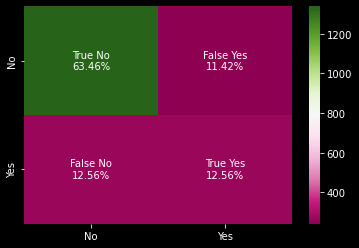


ROC Curve:


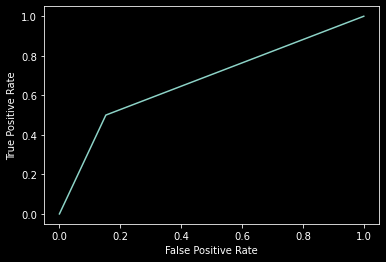

In [50]:
# Running KNN model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
result = model.fit(X_train, y_train)
a = evaluating(model,X_test,y_test)
acc.append(a)

In [29]:
#List Hyperparameters that we want to tune.
import time
t1 = time.time()
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
print('quick till here')
clf = GridSearchCV(knn_2, hyperparameters, cv=10, n_jobs=2)
t2 = time.time()
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Time taken:',t2-t1)
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

quick till here
Time taken: 0.000989675521850586
Best leaf_size: 1
Best p: 2
Best n_neighbors: 26


Accuracy: 79.0995260663507 %
ROC Score: 0.7030809648913303

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1580
           1       0.59      0.53      0.56       530

    accuracy                           0.79      2110
   macro avg       0.72      0.70      0.71      2110
weighted avg       0.78      0.79      0.79      2110


Confusion matrix


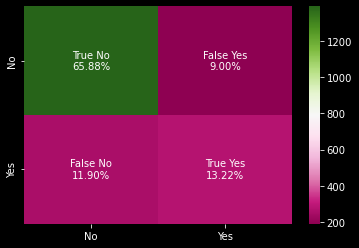


ROC Curve:


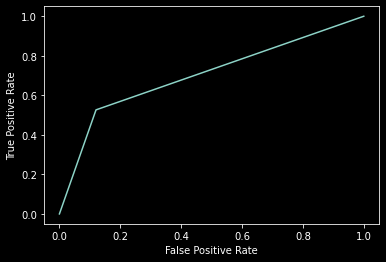

In [48]:
# Running KNN model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(metric='manhattan', n_neighbors=26, leaf_size=1)
result = model.fit(X_train, y_train)
a = evaluating(model,X_test,y_test)
acc.append(a)

Accuracy: 68.19905213270142 %
ROC Score: 0.724964174826845

              precision    recall  f1-score   support

           0       0.91      0.64      0.75      1580
           1       0.43      0.81      0.56       530

    accuracy                           0.68      2110
   macro avg       0.67      0.72      0.66      2110
weighted avg       0.79      0.68      0.70      2110



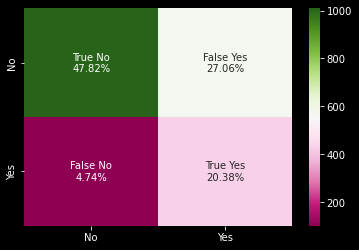

Accuracy: 71.18483412322276 %
ROC Score: 0.7323620730833533

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1580
           1       0.46      0.77      0.57       530

    accuracy                           0.71      2110
   macro avg       0.68      0.73      0.68      2110
weighted avg       0.79      0.71      0.73      2110



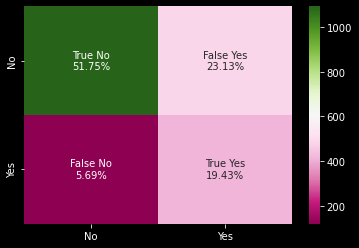

Accuracy: 70.521327014218 %
ROC Score: 0.7285586338667305

              precision    recall  f1-score   support

           0       0.90      0.68      0.78      1580
           1       0.45      0.78      0.57       530

    accuracy                           0.71      2110
   macro avg       0.68      0.73      0.67      2110
weighted avg       0.79      0.71      0.72      2110



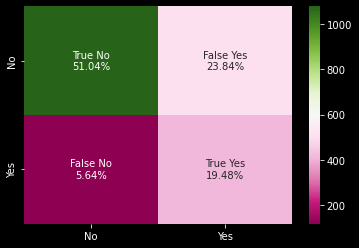

In [30]:
# Running Naive Bayes model
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
model = GaussianNB()
result = model.fit(X_train, y_train)
a = evaluating(model,X_test,y_test)
acc.append(a)

model = BernoulliNB()
result = model.fit(X_train, y_train)
a = evaluating(model,X_test,y_test)
acc.append(a)

model = MultinomialNB()
result = model.fit(X_train, y_train)
a = evaluating(model,X_test,y_test)
acc.append(a)

Accuracy: 71.46919431279622 %
ROC Score: 0.6458621925005971

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1580
           1       0.44      0.51      0.47       530

    accuracy                           0.71      2110
   macro avg       0.63      0.65      0.64      2110
weighted avg       0.73      0.71      0.72      2110



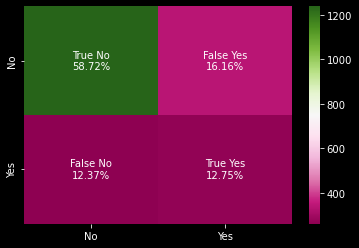

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
result = model.fit(X_train, y_train)
a = evaluating(model,X_test,y_test)
acc.append(a)

Accuracy: 72.32227488151659 %
ROC Score: 0.6484236923811798

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1580
           1       0.45      0.50      0.47       530

    accuracy                           0.72      2110
   macro avg       0.64      0.65      0.64      2110
weighted avg       0.73      0.72      0.73      2110



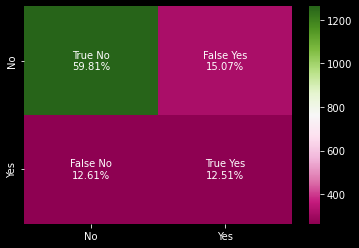

In [32]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
result = model.fit(X_train, y_train)
a = evaluating(model,X_test,y_test)
acc.append(a)

Accuracy: 73.17535545023696 %
ROC Score: 0.6591354191545258

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1580
           1       0.47      0.51      0.49       530

    accuracy                           0.73      2110
   macro avg       0.65      0.66      0.65      2110
weighted avg       0.74      0.73      0.74      2110



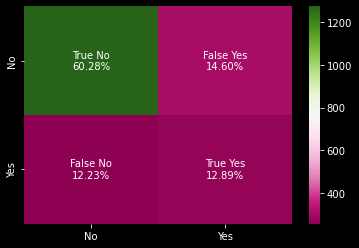

In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="log_loss")
result = model.fit(X_train, y_train)
a = evaluating(model,X_test,y_test)
acc.append(a)

Accuracy: 79.71563981042654 %
ROC Score: 0.6971638404585622

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1580
           1       0.62      0.50      0.55       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



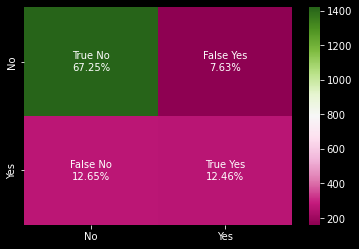

In [34]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
result = model.fit(X_train, y_train)
a = evaluating(model,X_test,y_test)
acc.append(a)

Accuracy: 80.66350710900474 %
ROC Score: 0.7135240028660138

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1580
           1       0.64      0.53      0.58       530

    accuracy                           0.81      2110
   macro avg       0.74      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



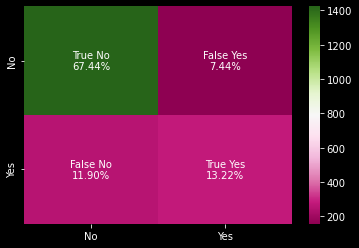

Accuracy: 80.61611374407583 %
ROC Score: 0.7044303797468354

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1580
           1       0.65      0.50      0.56       530

    accuracy                           0.81      2110
   macro avg       0.75      0.70      0.72      2110
weighted avg       0.79      0.81      0.80      2110



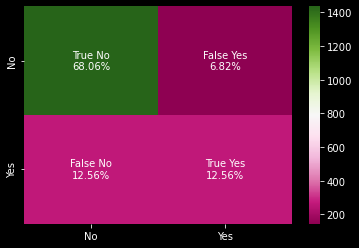

In [35]:
from sklearn.svm import LinearSVC, SVC
model = LinearSVC()
result = model.fit(X_train, y_train)
a = evaluating(model,X_test,y_test)
acc.append(a)

model = SVC()
result = model.fit(X_train, y_train)
a = evaluating(model,X_test,y_test)
acc.append(a)

Accuracy: 81.04265402843602 %
ROC Score: 0.7242058753283974

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1580
           1       0.64      0.55      0.59       530

    accuracy                           0.81      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.80      0.81      0.81      2110



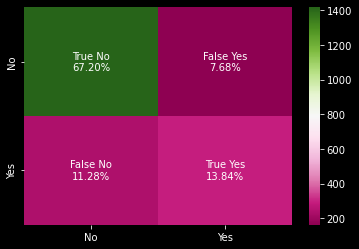

In [36]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
a = evaluating(model,X_test,y_test)
acc.append(a)

Accuracy: 79.71563981042654 %
ROC Score: 0.7040601862909005

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1580
           1       0.61      0.52      0.56       530

    accuracy                           0.80      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.79      0.80      0.79      2110



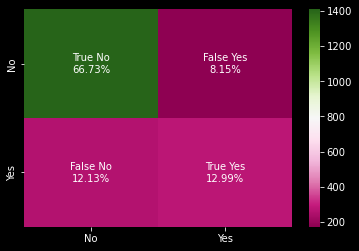

In [37]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
a = evaluating(model,X_test,y_test)
acc.append(a)

In [38]:
acc_dict = {'model':['Logistic Regresseion','KNN','GaussianNB','BernoulliNB','MultinomialNB','Decision Tree','Random Forest','Linear SVC','SVC','AdaBoost','XGBoost'],'accuracy': acc}

In [39]:
acc_df = pd.DataFrame(acc_dict)

ValueError: All arrays must be of the same length

In [ ]:
acc_df

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Model',fontdict=font,labelpad=40)
plt.ylabel('Accuracy',fontdict=font,labelpad=40)
plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=16)
plt.ylim([67,82])
sns.barplot(x=acc_df['model'], y=acc_df['accuracy'])
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Model',fontdict=font,labelpad=40)
plt.ylabel('Accuracy',fontdict=font,labelpad=40)
plt.xticks(fontsize=12, rotation='vertical')
plt.yticks(fontsize=16)
plt.ylim([67,82])
sns.pointplot(x=acc_df['model'], y=acc_df['accuracy'])
plt.show()

# Making Predictions

In [ ]:
def predict(model, to_pred):
    preds = model.predict(to_pred)
    preds = pd.DataFrame({'Churn': preds}) 
    preds = preds.replace([0,1], ["No","Yes"])   
    df = pd.concat([to_pred,preds], axis=1)
    return df

In [ ]:
to_pred = dfd.sample(n=3, random_state=10, ignore_index=True)

In [ ]:
to_pred

In [ ]:
to_pred = to_pred.drop(columns=['Churn'])

In [ ]:
AdaModel = AdaBoostClassifier()
AdaModel.fit(X_train,y_train)
predict(AdaModel,to_pred)